# Bar Plots showing alpha diversity for Metabolites and ASV tables:

**Updated on:** 22023-09-19 14:23:32 CEST

In this Jupyter Notebook we use the feature table and ASV count tables (16S, 18SV9) obtained for CCE data to get alpha diversity bar plots
**Author**: Abzer Kelminal (abzer.shah@uni-tuebingen.de) <br>
**Input file format**: .csv files <br>
**Output**: .svg images  <br>
**Dependencies**: dplyr, vegan, ggplot2

# Installing packages

In [126]:
# Installing packages:
if(require(vegan) == FALSE){install.packages('vegan')}
if(require(ggplot2) == FALSE){install.packages('ggplot2')}
if(require(dplyr) == FALSE){install.packages('dplyr')}

Loading required package: googledrive



In [127]:
# loading the installed libraries
library(vegan)
library(ggplot2)
library(dplyr)

# Load input data

In [9]:
#for using Metabolomics data, we are using the TIC normalized table
ft_url <-"https://raw.githubusercontent.com/Functional-Metabolomics-Lab/CCE_Data-Analysis/main/20220914_Input_files_for_Correlation_analysis/CCE_Normalised_Data.csv"
feature_table <- read.csv(ft_url)

head(feature_table)
dim(feature_table)

,Row.ID,Row.m.z,Row.RT,CCE_P1706_3.mzxml,CCE_P1706_4.mzxml,CCE_P1706_5.mzxml,CCE_P1706_6.mzxml,CCE_P1706_7.mzxml,CCE_P1706_8.mzxml,CCE_P1706_9.mzxml,...,CCE_P1706_221.mzxml,CCE_P1706_222.mzxml,CCE_P1706_223.mzxml,CCE_P1706_224.mzxml,CCE_P1706_225.mzxml,CCE_P1706_226.mzxml,CCE_P1706_227.mzxml,CCE_P1706_228.mzxml,CCE_P1706_229.mzxml,CCE_P1706_230.mzxml
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2492,150.128,2.676,0.000002930,0.000003690,0.000002740,0.000002070,0.000002440,0.000002820,0.000003100,...,0.000003170,0.000002800,0.00001180,0.000002830,0.000236714,0.000290522,0.000211238,0.000274079,0.000278415,0.000238976
2,129,151.035,0.550,0.001334518,0.002481587,0.000511703,0.001005175,0.000644174,0.000825979,0.001663834,...,0.001099565,0.000564127,0.00100717,0.001223748,0.001730357,0.000188482,0.001106029,0.001532877,0.000374890,0.000320765
3,1112,151.035,0.818,0.000002930,0.000003690,0.000002740,0.000002070,0.000002440,0.000002820,0.000003100,...,0.000003170,0.000002800,0.00000247,0.000002830,0.000001730,0.000002040,0.000001860,0.000001910,0.000001850,0.000001930
4,3075,151.073,2.864,0.000002930,0.000003690,0.000002740,0.000002070,0.000002440,0.000002820,0.000003100,...,0.000003170,0.000002800,0.00000247,0.000002830,0.000001730,0.000002040,0.000001860,0.000001910,0.000001850,0.000001930
5,542,152.057,0.836,0.000012900,0.000007100,0.000022900,0.000002070,0.000002440,0.000002820,0.000003100,...,0.000027100,0.000010500,0.00003350,0.000025900,0.000014400,0.000010400,0.000019900,0.000008700,0.000009800,0.000007410
6,31563,152.995,8.761,0.000002930,0.000003690,0.000002740,0.000002070,0.000002440,0.000002820,0.000003100,...,0.000003170,0.000002800,0.00000247,0.000002830,0.000001730,0.000002040,0.000001860,0.000001910,0.000001850,0.000001930


[1] 10644   231

In [12]:
# for using ASV 16S
asv16s_url <- 'https://raw.githubusercontent.com/Functional-Metabolomics-Lab/CCE_Data-Analysis/main/ASV_index/ASV16S_namedCCE.csv'
ft_asv16s <- read.csv(asv16s_url, check.names = T, header=T, row.names = 1)

head(ft_asv16s)
dim(ft_asv16s)

,Feature.ID,CCE_P1706_9.mzxml,CCE_P1706_10.mzxml,CCE_P1706_11.mzxml,CCE_P1706_12.mzxml,CCE_P1706_13.mzxml,CCE_P1706_14.mzxml,CCE_P1706_15.mzxml,CCE_P1706_16.mzxml,CCE_P1706_17.mzxml,...,CCE_P1706_282.mzxml,CCE_P1706_284.mzxml,Domain16S,Phylum16S,Class16S,Order16S,Family16S,Genus16S,Species16S,Confidence
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,00208b62ef66aa36e069777b853c8f17,0,0,0,0,0,0,0,0,0,...,0,0,Bacteria,Proteobacteria,Deltaproteobacteria,SAR324 clade(Marine group B),NA,NA,NA,0.8284995
2,00232f374cfc930f3fffbaef0d0c6d80,0,0,0,0,0,0,0,0,0,...,0,0,Bacteria,Proteobacteria,Gammaproteobacteria,NA,NA,NA,NA,1.0000000
3,0023a8c071538909ed3386e4e1d52278,0,0,0,0,0,0,0,0,0,...,0,0,Bacteria,Bacteroidetes,Ignavibacteria,OPB56,uncultured organism,uncultured organism,uncultured organism,0.7360358
4,00256e2eb0d211a7498c3e8b3170cedd,4,0,0,0,0,0,0,0,0,...,0,0,Bacteria,Marinimicrobia (SAR406 clade),NA,NA,NA,NA,NA,0.9999943
5,002ae12276a5da377dd6f7d5452a388a,0,0,0,0,0,0,0,0,0,...,0,0,Bacteria,Bacteroidetes,Bacteroidia,Flavobacteriales,NS9 marine group,NA,NA,0.9964438
6,002c14075180e4484913e02e02dead50,0,0,13,0,0,0,0,0,11,...,0,0,Bacteria,Bacteroidetes,Bacteroidia,Flavobacteriales,Crocinitomicaceae,Crocinitomix,uncultured Bacteroidetes/Chlorobi group bacterium,0.9999990


[1] 7534  187

In [91]:
# for using ASV 18S
asv18s_url <- 'https://raw.githubusercontent.com/Functional-Metabolomics-Lab/CCE_Data-Analysis/main/ASV_index/ASV18SV9_namedCCE.csv'
ft_asv18s <- read.csv(asv18s_url, check.names = T, header=T, row.names = 1)

head(ft_asv18s)
dim(ft_asv18s)

,Feature.ID,CCE_P1706_9.mzxml,CCE_P1706_10.mzxml,CCE_P1706_11.mzxml,CCE_P1706_12.mzxml,CCE_P1706_13.mzxml,CCE_P1706_14.mzxml,CCE_P1706_15.mzxml,CCE_P1706_16.mzxml,CCE_P1706_17.mzxml,...,X,Domain18SV9,Kingdom18SV9,Phylum18SV9,Class18SV9,Order18SV9,Family18SV9,Genus18SV9,Species18SV9,Confidence
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,000167ce642266c21c62843e4a010266,0,0,0,0,0,0,0,0,0,...,6114,Eukaryota,Rhizaria,Radiolaria,Acantharea,Acantharea_X,Acantharea_XX,Acantharea_XXX,Acantharea_XXX_sp.,0.9991760
2,001567b7cb76eecd73f31a288fcfcb69,0,0,0,0,0,0,0,0,0,...,9879,Eukaryota,Stramenopiles,NA,NA,NA,NA,NA,NA,0.7359983
3,0018f741aa09de859e5af52f19a2b7c1,0,0,0,0,0,0,0,0,0,...,5051,Eukaryota,NA,NA,NA,NA,NA,NA,NA,1.0000000
4,00236daa14e0b5a92c512b565be61b51,0,0,0,0,0,0,0,0,0,...,9634,Eukaryota,Archaeplastida,Chlorophyta,Chlorophyceae,NA,NA,NA,NA,0.8520327
5,003695728276f773ed0c54ca361198e2,0,0,0,0,0,0,0,0,0,...,5130,Eukaryota,NA,NA,NA,NA,NA,NA,NA,1.0000000
6,0038284216ef9b1f951a5f4e5d4a3aea,0,0,0,0,0,0,0,0,0,...,2268,Eukaryota,Archaeplastida,Chlorophyta,Pyramimonadales,Pyramimonadales_X,Pyramimonadales_XX,Halosphaera,Halosphaera_sp.,0.9981855


[1] 10282   189

In [13]:
#metadata
md_url <- "https://raw.githubusercontent.com/Functional-Metabolomics-Lab/CCE_Data-Analysis/main/raw%20files/metadata_CCE.csv"
metadata <- read.csv(md_url)
head(metadata)
dim(metadata)

,filename,ATTRIBUTE_x,ATTRIBUTE_y,ATTRIBUTE_z,ATTRIBUTE_Spot_size,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Sample_Number,ATTRIBUTE_Date,ATTRIBUTE_Cast,ATTRIBUTE_Event_Number,...,ATTRIBUTE_O2_Saturation__per_,ATTRIBUTE_O2_saturation_binned,ATTRIBUTE_PO4,ATTRIBUTE_NO2,ATTRIBUTE_NO3,ATTRIBUTE_NH4,ATTRIBUTE_PO4_binned,ATTRIBUTE_NO2_binned,ATTRIBUTE_NO3_binned,ATTRIBUTE_NH4_binned
,<chr>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<int>,<int>,<int>,<int>,...,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,Blank_CCE_P1706_1.mzxml,0.0,0.0,0.0,1,Blank,1,20170602,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
2,Blank_CCE_P1706_2.mzxml,0.0,0.0,0.0,1,Blank,2,20170602,NA,NA,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
3,CCE_P1706_3.mzxml,-80.1,85.1,101.5,1,Control,3,20170602,2,NA,...,NA,NA,3.631,1.851,12.690,0.498,3.6,1.9,13,0.5
4,CCE_P1706_4.mzxml,-80.1,85.1,101.5,1,Control,4,20170602,2,NA,...,NA,NA,3.631,1.851,12.690,0.498,3.6,1.9,13,0.5
5,CCE_P1706_5.mzxml,-80.1,85.1,102.5,1,Control,5,20170602,2,NA,...,NA,NA,3.360,0.344,19.899,0.022,3.4,0.3,20,0.0
6,CCE_P1706_6.mzxml,-80.1,85.1,102.5,1,Control,6,20170602,2,NA,...,NA,NA,3.360,0.344,19.899,0.022,3.4,0.3,20,0.0


[1] 230  33

# Filtering the metadata

In [14]:
# Notice the md rows are filtered for depth ranges '0-30m' and '70-150m':

md <-  metadata %>% filter(ATTRIBUTE_Filament_Possition != 'Blank',
                           ATTRIBUTE_Location!='Santa_Barbara_Basin',
                           ATTRIBUTE_Location!='Transcet_1',
                           ATTRIBUTE_Location!='Transcet_2',
                           ATTRIBUTE_Location!='Transect_3',
                           ATTRIBUTE_Depth_Range == '0-30'|
                           ATTRIBUTE_Depth_Range == '70-150')  
rownames(md) <- md$filename

#Picking only the 4 columns of interest from our metadata
md <- md[,c("ATTRIBUTE_Filament_Possition","ATTRIBUTE_Depth","ATTRIBUTE_Depth_Range","ATTRIBUTE_Location" )] 

md$ATTRIBUTE_Location <- as.factor(md$ATTRIBUTE_Location) #converting to factor level
Loc_levels <- levels(md$ATTRIBUTE_Location)
Loc_levels

[1] "Cycle_1_day1" "Cycle_1_day2" "Cycle_1_day3" "Cycle_2_day1" "Cycle_2_day2"
 [6] "Cycle_2_day3" "Cycle_2_day4" "Cycle_3_day1" "Cycle_3_day2" "Cycle_3_day3"
[11] "Cycle_4_day1" "Cycle_4_day2"

# Arranging the feature table in the same order as the metadata

In [28]:
#Arranging the mzmine feature table in the right format:
ft <- feature_table

#substituting the file extension in the colnames of ft with mzxml
colnames(ft) <- gsub('_MSMS.mzXML.Peak.area','.mzxml',colnames(ft))  

#Taking row ID, m/z value and RZ as the rownames of ft
rownames(ft) <- paste(ft$'Row.ID', round(ft$'Row.m.z',digits = 3),round(ft$'Row.RT',digits = 3), sep = '_') 

#remove the first 3 cols which are the ID,m/z, RT
ft <- ft[,-1:-3] 

#lets split only the CCE data
ft_CCE <- ft %>% select(contains('CCE')) 

#picking only the columns in ft as that of md rows
ft_CCE <- ft_CCE[,colnames(ft_CCE) %in% rownames(md)] 

# make the columns in ft in the same order of md rownames
ft_CCE <- ft_CCE[,match(rownames(md), colnames(ft_CCE))] 
identical(colnames(ft_CCE),rownames(md)) # should return TRUE

[1] TRUE

# Custom Function to reproduce boxplots for 2 sets of depth ranges

In [59]:
alpha_diversity_boxplot <- function(table, y_axis){
    ggplot(table, aes(x = ATTRIBUTE_Location, 
                   y = y_axis, 
                   color = ATTRIBUTE_Depth_Range,
                   fill = ATTRIBUTE_Location)) + 
    #arranging the x axis values
    scale_x_discrete(limits = c("Cycle_1_day1","Cycle_1_day2", "Cycle_1_day3" , 
                                "Cycle_2_day1", "Cycle_2_day2" ,"Cycle_2_day3" ,"Cycle_2_day4",
                                "Cycle_4_day1", "Cycle_4_day2",
                                "Cycle_3_day1", "Cycle_3_day2", "Cycle_3_day3")) +
    geom_boxplot() +
    # scale_fill_manual to fill the box plot colors according to cycle levels
    scale_fill_manual(values = c("#8B1A1A","#CD2626","#FF3030",
                                 "#2E8B57","#43CD80","#4EEE94","#54FF9F",
                                 "#7A378B","#B452CD",
                                 "#D15FEE","#1874CD","#1E90FF")) +
    # scale_colour_manual to border colors for the two sets of depth ranges
    scale_colour_manual(values = c("black","gray")) +
    labs(subtitle = paste("No. of samples =", nrow(table)), y = "Shannon Diversity", x="") +  
    theme(axis.text = element_text(size = 16),
          axis.text.x = element_text(angle = -90, vjust = 0.5, hjust=1),
          axis.title = element_text(size = 16, face= 'bold'),
          plot.title = element_text(size = 18, face= 'bold', hjust=0.5),
          legend.title = element_text(size = 18, face= 'bold'),
          plot.subtitle = element_text(face = "italic"),
          legend.text = element_text(size = 16),
          panel.background = element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, linewidth=1)) 
}

# Alpha Diversity

Ecological diversity is like measuring how many different types of organisms are in a specific place. We can look at this in two main ways, alpha and beta diversity (Whittaker 1960). The 'vegan' package in R is a popular tool for these diversity calculations in R.

**Alpha Diversity**: It is a measure of microbiome diversity applicable to a single sample . It is generally based on the number and relative abundance (OTU) of taxa at some level, such as Species or Genus level. Common alpha diversity statistics as given in the 'diversity()' function from the vegan package:
   - **Shannon**: This measures unpredictability. Higher values mean more difficult to predict the identity of a randomly chosen individual.
   - **Simpson**: This measures the probability that two randomly chosen individuals are of the same level (eg: Species)
   - **Inverse Simpson**: Assuming, if all species were equally abundant in a theoretical community, this value tells us how many species you'd expect.
  </br>
**Beta Diversity**: Beta diversity is a measure of the similarity or dissimilarity of two communities. eg: Bray-Curtis dissimilarity

For more information: For https://grunwaldlab.github.io/analysis_of_microbiome_community_data_in_r/07--diversity_stats.html

## 1. Feature table (Metabolomics)

In [32]:
shannon_div <- diversity(t(ft_CCE), index = "shannon") # calculating the shannon-diversity or alpha-diversity
md$Shannon_Feature_table <- shannon_div # adding that value to the metadata table

In [33]:
head(md)

,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Depth,ATTRIBUTE_Depth_Range,ATTRIBUTE_Location,Shannon_Feature_table
,<chr>,<int>,<chr>,<fct>,<dbl>
CCE_P1706_39.mzxml,Cycle_1,100,70-150,Cycle_1_day1,7.529224
CCE_P1706_40.mzxml,Cycle_1,100,70-150,Cycle_1_day1,7.693635
CCE_P1706_41.mzxml,Cycle_1,75,70-150,Cycle_1_day1,7.683532
CCE_P1706_42.mzxml,Cycle_1,75,70-150,Cycle_1_day1,7.740841
CCE_P1706_45.mzxml,Cycle_1,30,0-30,Cycle_1_day1,7.803156
CCE_P1706_46.mzxml,Cycle_1,30,0-30,Cycle_1_day1,7.795620


In [38]:
options(repr.plot.width=15, repr.plot.height=15, res=128) # we are redefining the plot size as these combined plots have increased width

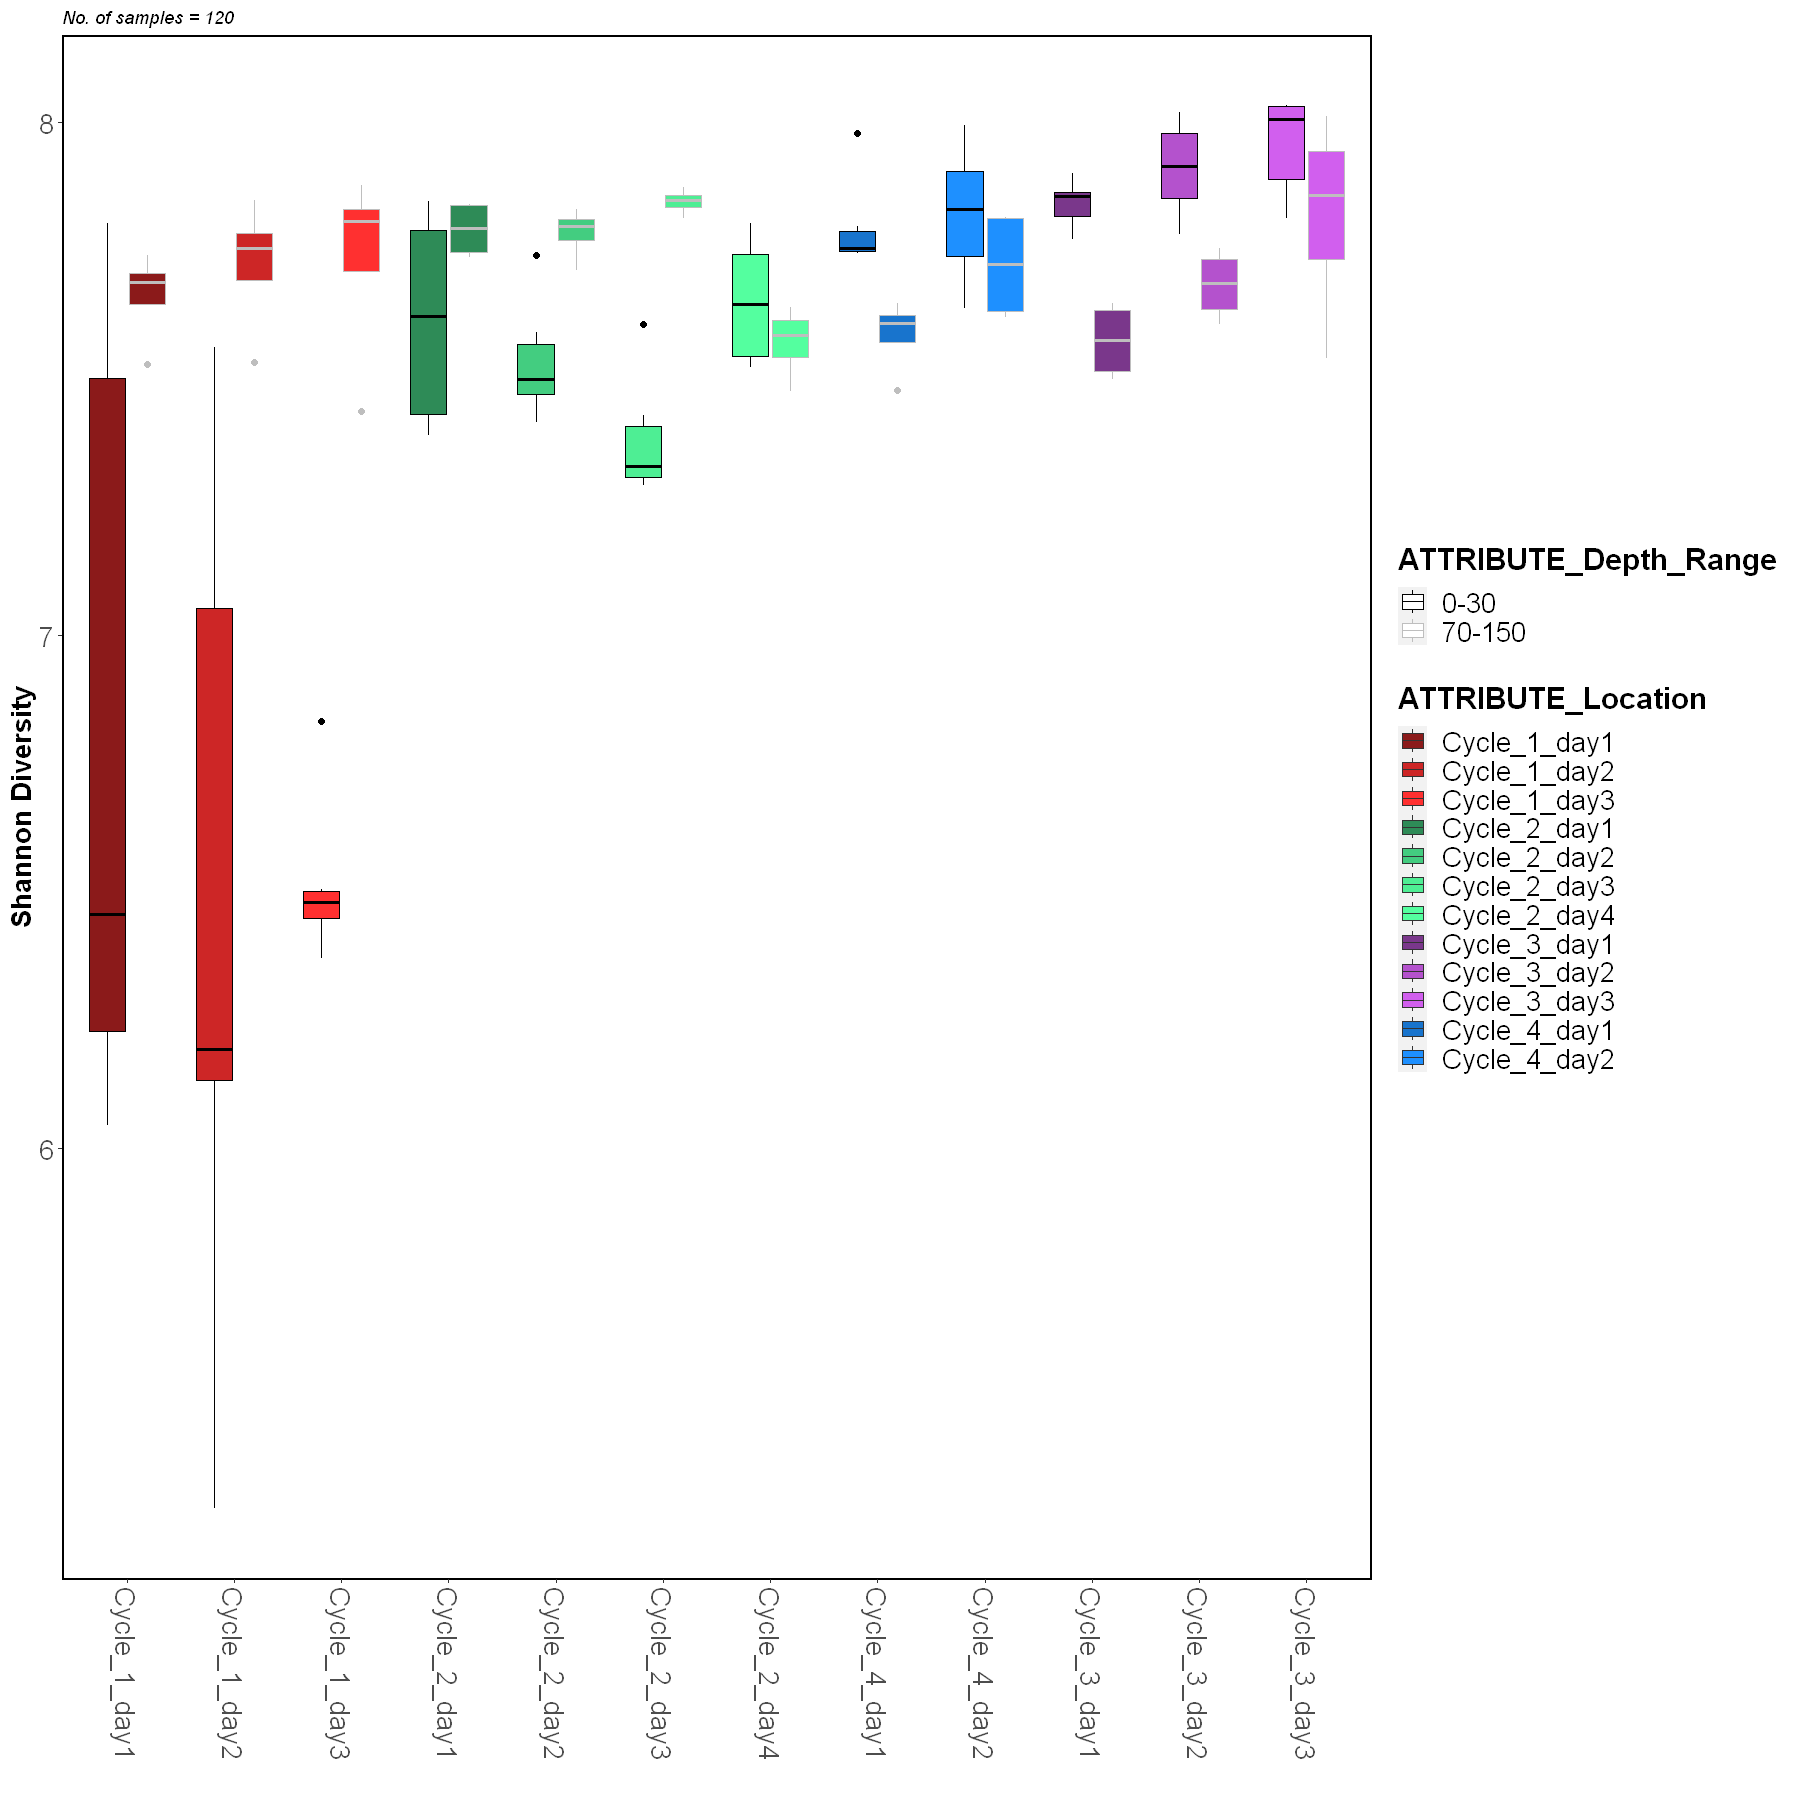

In [39]:
ft_alphadiversity_plot <- alpha_diversity_boxplot(table = md, y_axis = md$`Shannon_Feature_table`)
ft_alphadiversity_plot

In [42]:
setwd("G:/My Drive/CCE DATA/Figures/Alpha_Diversity")

In [47]:
ggsave("boxplots_alpha_diversity_0-30m_70-150m.svg", ft_alphadiversity_plot, width=12, height=10) 

## 2. ASV16S

In [74]:
head(ft_asv16s)

,Feature.ID,CCE_P1706_9.mzxml,CCE_P1706_10.mzxml,CCE_P1706_11.mzxml,CCE_P1706_12.mzxml,CCE_P1706_13.mzxml,CCE_P1706_14.mzxml,CCE_P1706_15.mzxml,CCE_P1706_16.mzxml,CCE_P1706_17.mzxml,...,CCE_P1706_282.mzxml,CCE_P1706_284.mzxml,Domain16S,Phylum16S,Class16S,Order16S,Family16S,Genus16S,Species16S,Confidence
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,00208b62ef66aa36e069777b853c8f17,0,0,0,0,0,0,0,0,0,...,0,0,Bacteria,Proteobacteria,Deltaproteobacteria,SAR324 clade(Marine group B),NA,NA,NA,0.8284995
2,00232f374cfc930f3fffbaef0d0c6d80,0,0,0,0,0,0,0,0,0,...,0,0,Bacteria,Proteobacteria,Gammaproteobacteria,NA,NA,NA,NA,1.0000000
3,0023a8c071538909ed3386e4e1d52278,0,0,0,0,0,0,0,0,0,...,0,0,Bacteria,Bacteroidetes,Ignavibacteria,OPB56,uncultured organism,uncultured organism,uncultured organism,0.7360358
4,00256e2eb0d211a7498c3e8b3170cedd,4,0,0,0,0,0,0,0,0,...,0,0,Bacteria,Marinimicrobia (SAR406 clade),NA,NA,NA,NA,NA,0.9999943
5,002ae12276a5da377dd6f7d5452a388a,0,0,0,0,0,0,0,0,0,...,0,0,Bacteria,Bacteroidetes,Bacteroidia,Flavobacteriales,NS9 marine group,NA,NA,0.9964438
6,002c14075180e4484913e02e02dead50,0,0,13,0,0,0,0,0,11,...,0,0,Bacteria,Bacteroidetes,Bacteroidia,Flavobacteriales,Crocinitomicaceae,Crocinitomix,uncultured Bacteroidetes/Chlorobi group bacterium,0.9999990


In [82]:
# Setting row names and dropping the 'Feature.ID' column
ft_16s <- ft_asv16s
rownames(ft_16s) <- ft_asv16s$Feature.ID
ft_16s <- ft_16s[,-1]

In [85]:
# Summing up values grouped by 'Genus16S' for columns containing 'CCE'
ft_16s_genus <- ft_16s %>%
  select(c('Genus16S', contains('CCE'))) %>%
  group_by(Genus16S) %>%
  summarise(across(starts_with('CCE'), sum, na.rm = TRUE))

head(ft_16s_genus)

Genus16S,CCE_P1706_9.mzxml,CCE_P1706_10.mzxml,CCE_P1706_11.mzxml,CCE_P1706_12.mzxml,CCE_P1706_13.mzxml,CCE_P1706_14.mzxml,CCE_P1706_15.mzxml,CCE_P1706_16.mzxml,CCE_P1706_17.mzxml,...,CCE_P1706_264.mzxml,CCE_P1706_268.mzxml,CCE_P1706_270.mzxml,CCE_P1706_272.mzxml,CCE_P1706_274.mzxml,CCE_P1706_276.mzxml,CCE_P1706_278.mzxml,CCE_P1706_280.mzxml,CCE_P1706_282.mzxml,CCE_P1706_284.mzxml
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
A714019,38,23,14,8,0,0,31,20,7,...,36,31,19,31,135,136,0,79,100,0
AT-s3-44,47,16,14,8,0,0,95,28,4,...,16,7,10,14,61,54,0,0,7,0
Acanthopleuribacter,0,0,0,0,0,0,0,0,0,...,0,0,0,0,5,0,0,1,3,0
Achromobacter,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acinetobacter,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Aestuariibacter,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
ft_16s <- ft_16s_genus %>% select(contains('CCE')) #CHANGE THIS to 'ft_16s_genus' if doing it for genus level; else 'ft_16s'

ft_16s <- ft_16s[,colnames(ft_16s) %in% rownames(md)]

# Aligning rows of 'md' with columns of 'ft_CCE'
md_16s <- md[rownames(md) %in% colnames(ft_16s),]

# Ensure columns in 'ft_CCE' are in the same order as 'md' rownames
ft_16s <- ft_16s[, match(rownames(md_16s), colnames(ft_16s))]

# Check for identicalness
identical(colnames(ft_16s), rownames(md_16s)) #should return TRUE

[1] TRUE

In [87]:
# calculating the shannon-diversity

shannon_div_16s <- diversity(t(ft_16s), index = "shannon") 
#md_16s$Shannon_16s <- shannon_div_16s # adding that value to the metadata table
md_16s$Shannon_16s_genus <- shannon_div_16s # adding that value to the metadata table

In [88]:
head(md_16s)

,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Depth,ATTRIBUTE_Depth_Range,ATTRIBUTE_Location,Shannon_Feature_table,Shannon_16s_genus
,<chr>,<int>,<chr>,<fct>,<dbl>,<dbl>
CCE_P1706_40.mzxml,Cycle_1,100,70-150,Cycle_1_day1,7.693635,3.353710
CCE_P1706_42.mzxml,Cycle_1,75,70-150,Cycle_1_day1,7.740841,3.331643
CCE_P1706_46.mzxml,Cycle_1,30,0-30,Cycle_1_day1,7.795620,3.211829
CCE_P1706_48.mzxml,Cycle_1,8,0-30,Cycle_1_day1,6.293853,2.841373
CCE_P1706_50.mzxml,Cycle_1,0,0-30,Cycle_1_day1,6.045000,2.745048
CCE_P1706_52.mzxml,Cycle_1,100,70-150,Cycle_1_day2,7.762334,3.338255


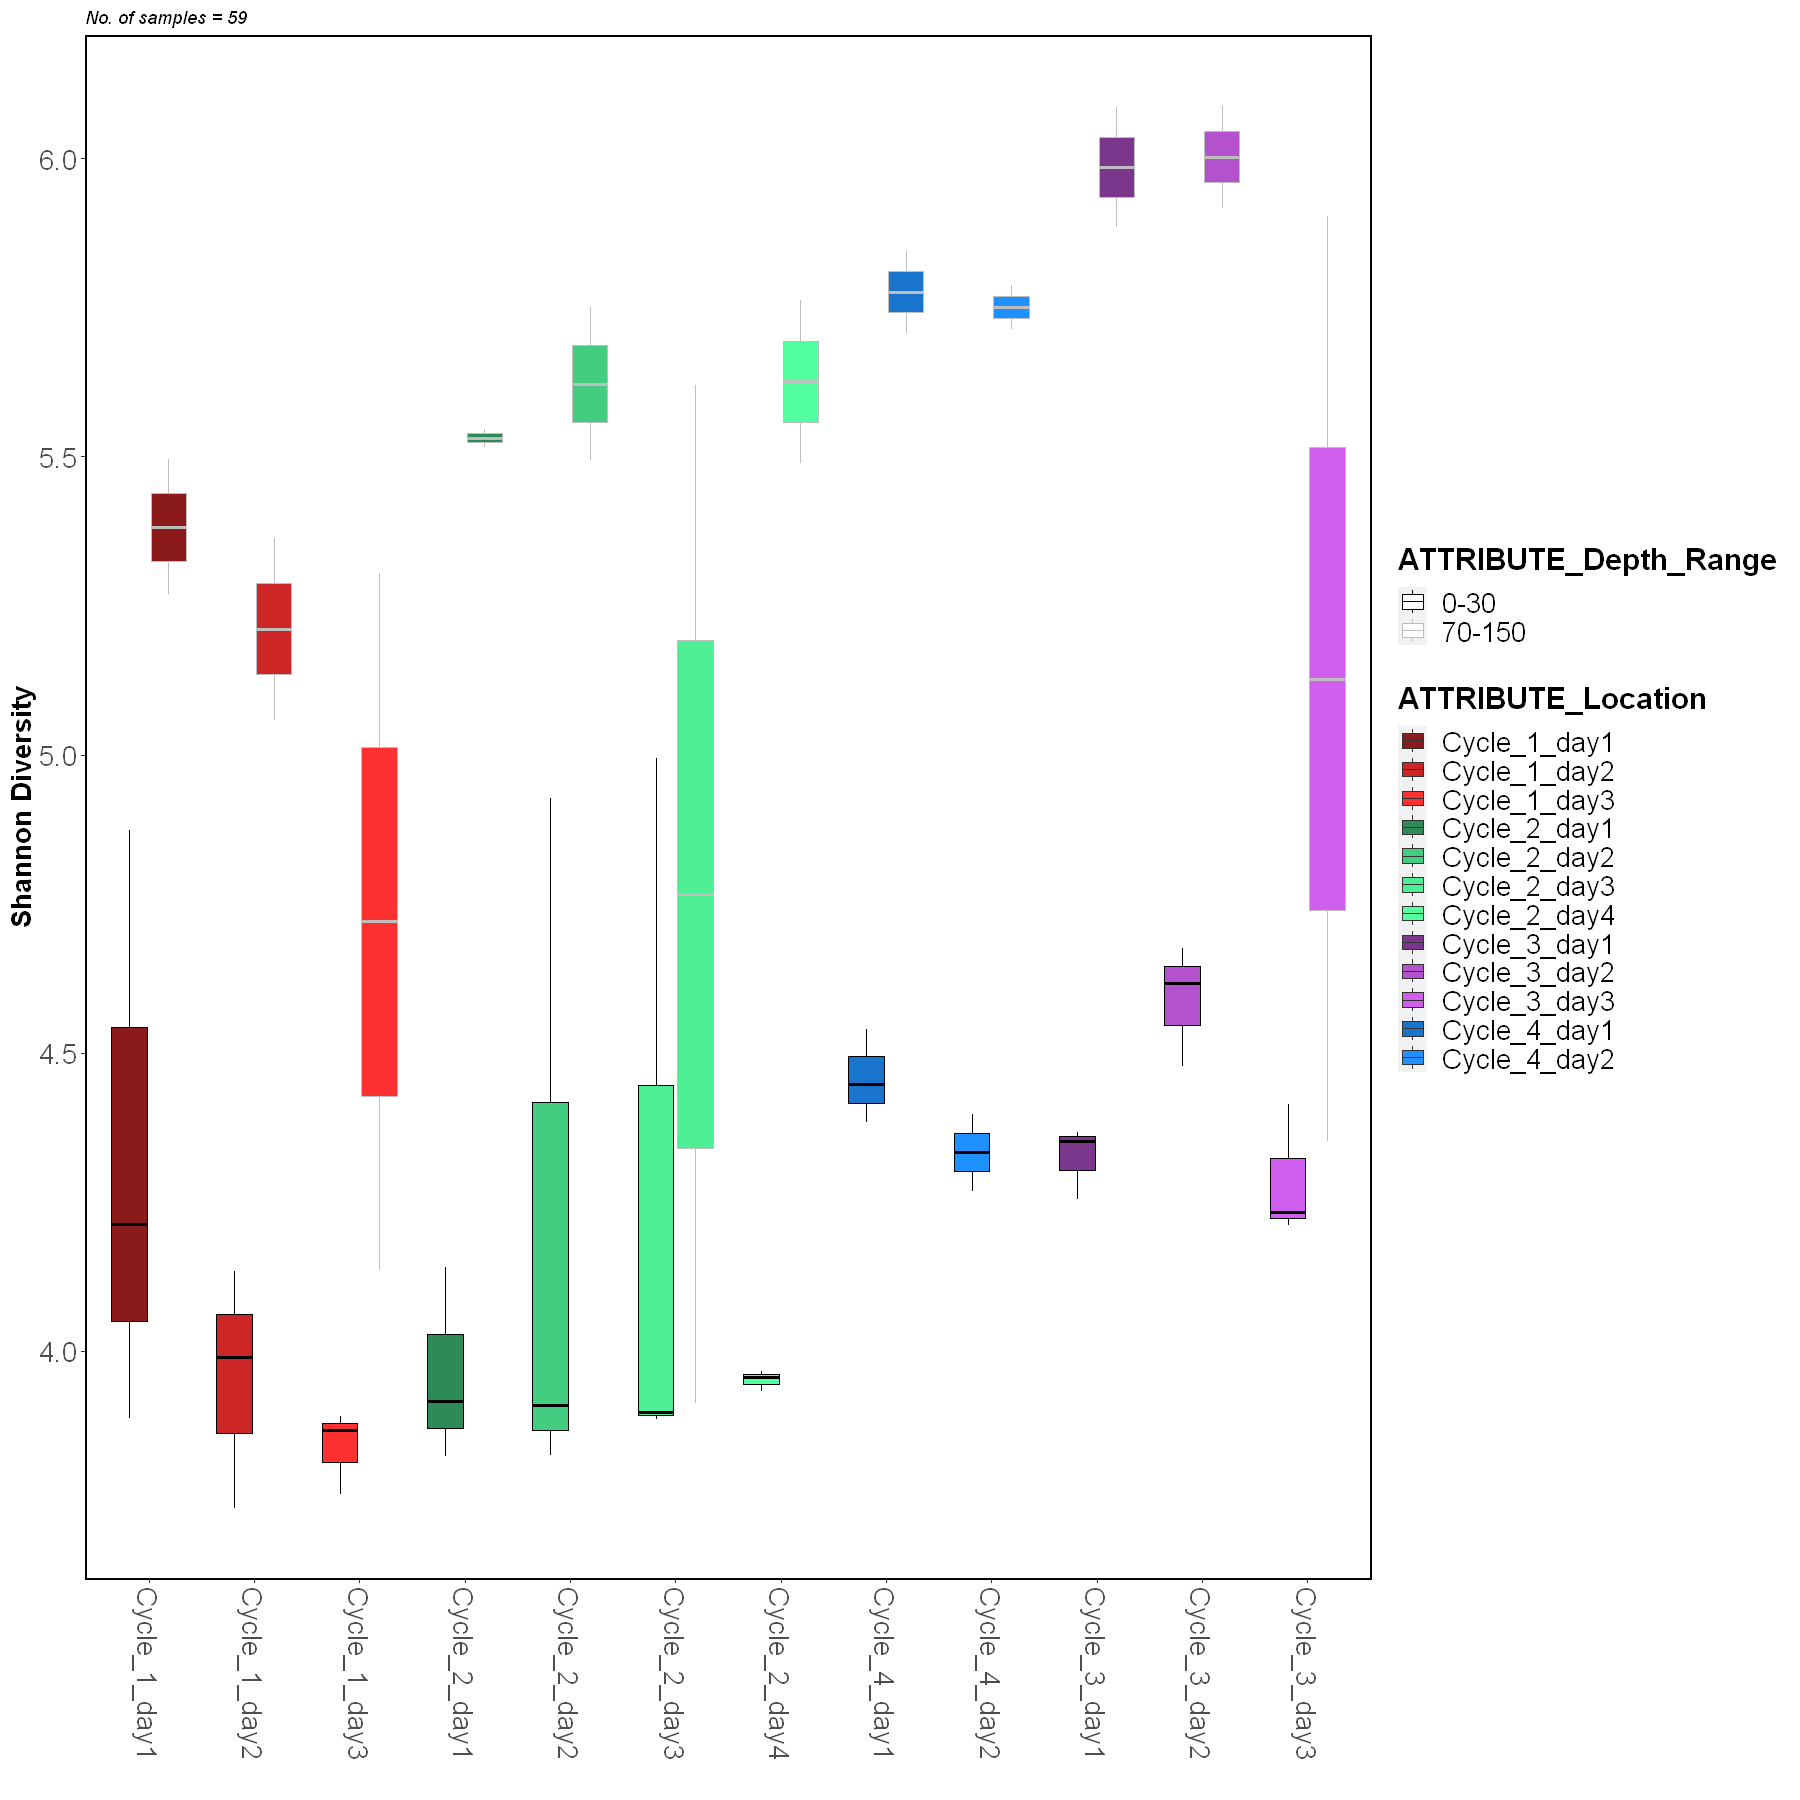

In [60]:
asv16s_alphadiversity_plot <- alpha_diversity_boxplot(table = md_16s, y_axis = md_16s$`Shannon_16s`)
asv16s_alphadiversity_plot

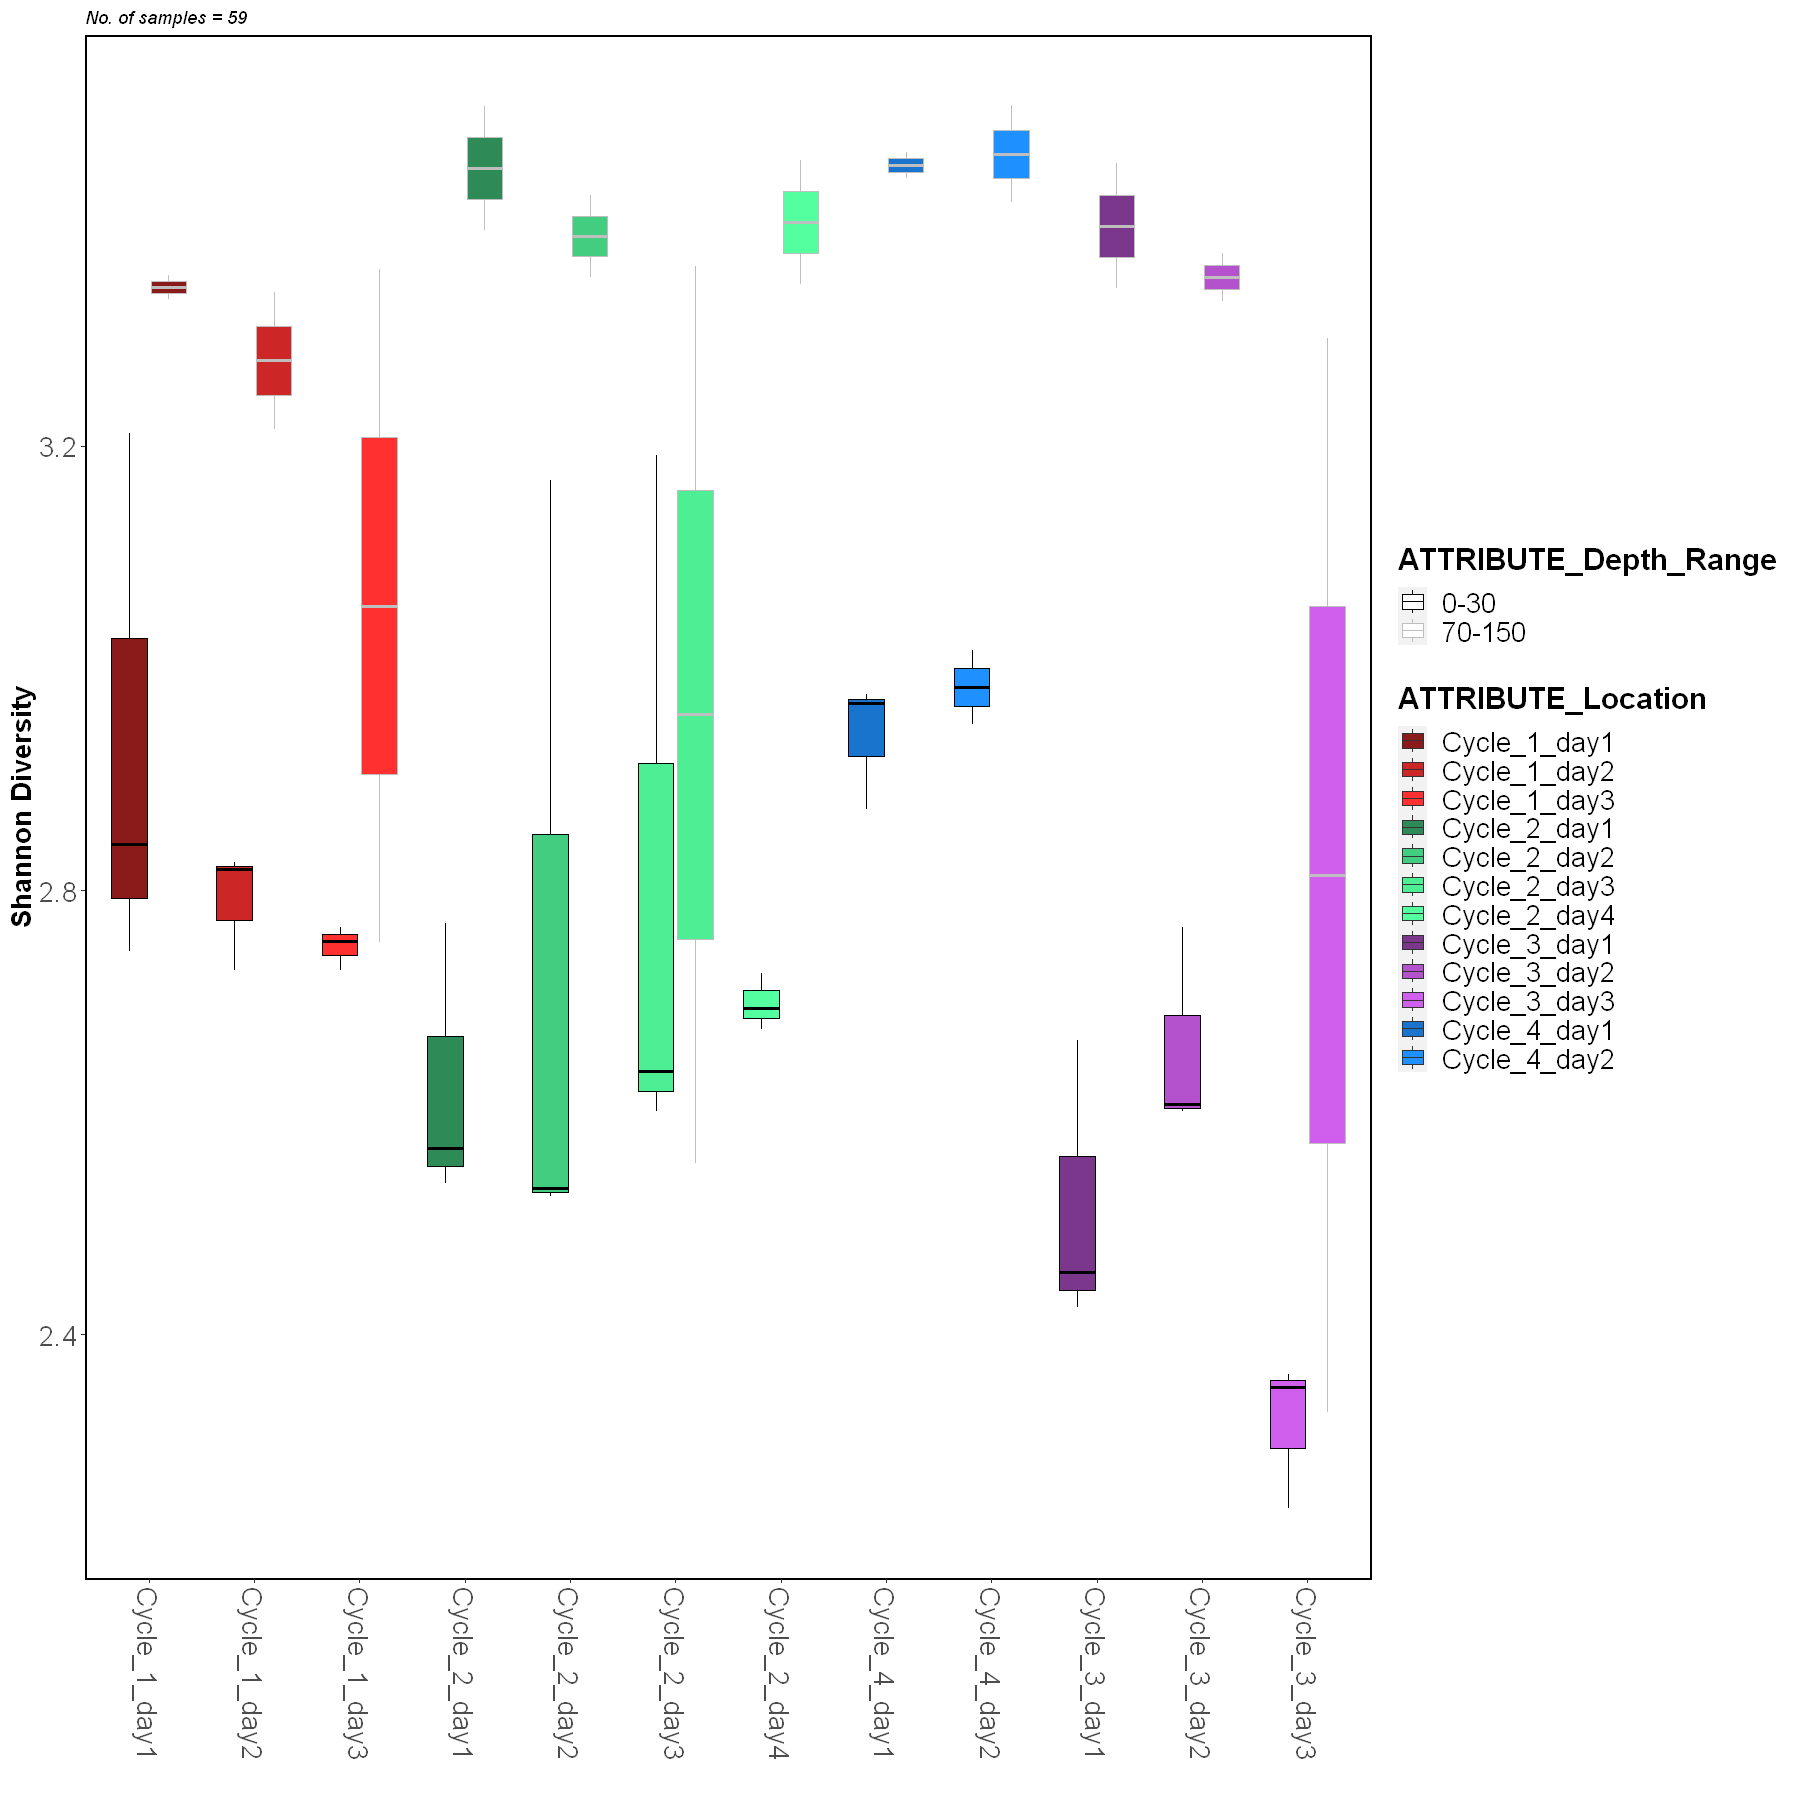

In [89]:
asv16s_alphadiversity_plot_genus <- alpha_diversity_boxplot(table = md_16s, y_axis = md_16s$`Shannon_16s_genus`)
asv16s_alphadiversity_plot_genus

In [90]:
#ggsave("boxplots_alpha_diversity_0-30m_70-150m_asv16s_species.svg", asv16s_alphadiversity_plot, width=12, height=10) 
ggsave("boxplots_alpha_diversity_0-30m_70-150m_asv16s_genus.svg", asv16s_alphadiversity_plot_genus, width=12, height=10) 

## 3. ASV18S

In [109]:
head(ft_asv18s)

,Feature.ID,CCE_P1706_9.mzxml,CCE_P1706_10.mzxml,CCE_P1706_11.mzxml,CCE_P1706_12.mzxml,CCE_P1706_13.mzxml,CCE_P1706_14.mzxml,CCE_P1706_15.mzxml,CCE_P1706_16.mzxml,CCE_P1706_17.mzxml,...,X,Domain18SV9,Kingdom18SV9,Phylum18SV9,Class18SV9,Order18SV9,Family18SV9,Genus18SV9,Species18SV9,Confidence
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,000167ce642266c21c62843e4a010266,0,0,0,0,0,0,0,0,0,...,6114,Eukaryota,Rhizaria,Radiolaria,Acantharea,Acantharea_X,Acantharea_XX,Acantharea_XXX,Acantharea_XXX_sp.,0.9991760
2,001567b7cb76eecd73f31a288fcfcb69,0,0,0,0,0,0,0,0,0,...,9879,Eukaryota,Stramenopiles,NA,NA,NA,NA,NA,NA,0.7359983
3,0018f741aa09de859e5af52f19a2b7c1,0,0,0,0,0,0,0,0,0,...,5051,Eukaryota,NA,NA,NA,NA,NA,NA,NA,1.0000000
4,00236daa14e0b5a92c512b565be61b51,0,0,0,0,0,0,0,0,0,...,9634,Eukaryota,Archaeplastida,Chlorophyta,Chlorophyceae,NA,NA,NA,NA,0.8520327
5,003695728276f773ed0c54ca361198e2,0,0,0,0,0,0,0,0,0,...,5130,Eukaryota,NA,NA,NA,NA,NA,NA,NA,1.0000000
6,0038284216ef9b1f951a5f4e5d4a3aea,0,0,0,0,0,0,0,0,0,...,2268,Eukaryota,Archaeplastida,Chlorophyta,Pyramimonadales,Pyramimonadales_X,Pyramimonadales_XX,Halosphaera,Halosphaera_sp.,0.9981855


In [120]:
# Setting row names and dropping the 'Feature.ID' column
ft_18s <- ft_asv18s
rownames(ft_18s) <- ft_asv18s$Feature.ID
ft_18s <- ft_18s[,-1]

In [111]:
# Summing up values grouped by 'Genus18S' for columns containing 'CCE'
ft_18s_genus <- ft_18s %>%
  select(c('Genus18SV9', contains('CCE'))) %>%
  group_by(Genus18SV9) %>%
  summarise(across(starts_with('CCE'), sum, na.rm = TRUE))

head(ft_18s_genus)

Genus18SV9,CCE_P1706_9.mzxml,CCE_P1706_10.mzxml,CCE_P1706_11.mzxml,CCE_P1706_12.mzxml,CCE_P1706_13.mzxml,CCE_P1706_14.mzxml,CCE_P1706_15.mzxml,CCE_P1706_16.mzxml,CCE_P1706_17.mzxml,...,CCE_P1706_264.mzxml,CCE_P1706_268.mzxml,CCE_P1706_270.mzxml,CCE_P1706_272.mzxml,CCE_P1706_274.mzxml,CCE_P1706_276.mzxml,CCE_P1706_278.mzxml,CCE_P1706_280.mzxml,CCE_P1706_282.mzxml,CCE_P1706_284.mzxml
<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Acantharea-Group-II_XX,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acantharea-Group-I_XX,17,25,0,0,0,0,42,3,8,...,0,0,0,0,12,10,10,8,17,0
Acantharea-Group-VI_XX,9,17,3,0,0,0,0,64,4,...,0,152,0,0,0,0,0,0,10,0
Acantharea_XXX,55,82,80,43,9,0,74,62,22,...,104,32,43,22,13,36,0,28,63,0
Acanthoecidae_Group_G_X,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Acanthometra,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [121]:
ft_18s <- ft_18s %>% select(contains('CCE')) #CHANGE THIS to 'ft_18s_genus' if doing it for genus level; else 'ft_18s'

ft_18s <- ft_18s[,colnames(ft_18s) %in% rownames(md)]

# Aligning rows of 'md' with columns of 'ft_CCE'
md_18s <- md[rownames(md) %in% colnames(ft_18s),]

# Ensure columns in 'ft_CCE' are in the same order as 'md' rownames
ft_18s <- ft_18s[, match(rownames(md_18s), colnames(ft_18s))]

# Check for identicalness
identical(colnames(ft_18s), rownames(md_18s)) #should return TRUE

[1] TRUE

In [122]:
# calculating the shannon-diversity
shannon_div_18s <- diversity(t(ft_18s), index = "shannon") 

In [123]:
#adding that value to the metadata table

md_18s$Shannon_18s <- shannon_div_18s      #uncomment for species level
#md_18s$Shannon_18s_genus <- shannon_div_18s #uncomment for genus level

In [124]:
head(md_18s)

,ATTRIBUTE_Filament_Possition,ATTRIBUTE_Depth,ATTRIBUTE_Depth_Range,ATTRIBUTE_Location,Shannon_Feature_table,Shannon_18s
,<chr>,<int>,<chr>,<fct>,<dbl>,<dbl>
CCE_P1706_40.mzxml,Cycle_1,100,70-150,Cycle_1_day1,7.693635,5.586678
CCE_P1706_42.mzxml,Cycle_1,75,70-150,Cycle_1_day1,7.740841,5.578428
CCE_P1706_46.mzxml,Cycle_1,30,0-30,Cycle_1_day1,7.795620,4.513948
CCE_P1706_48.mzxml,Cycle_1,8,0-30,Cycle_1_day1,6.293853,3.446069
CCE_P1706_50.mzxml,Cycle_1,0,0-30,Cycle_1_day1,6.045000,3.585897
CCE_P1706_52.mzxml,Cycle_1,100,70-150,Cycle_1_day2,7.762334,4.972275


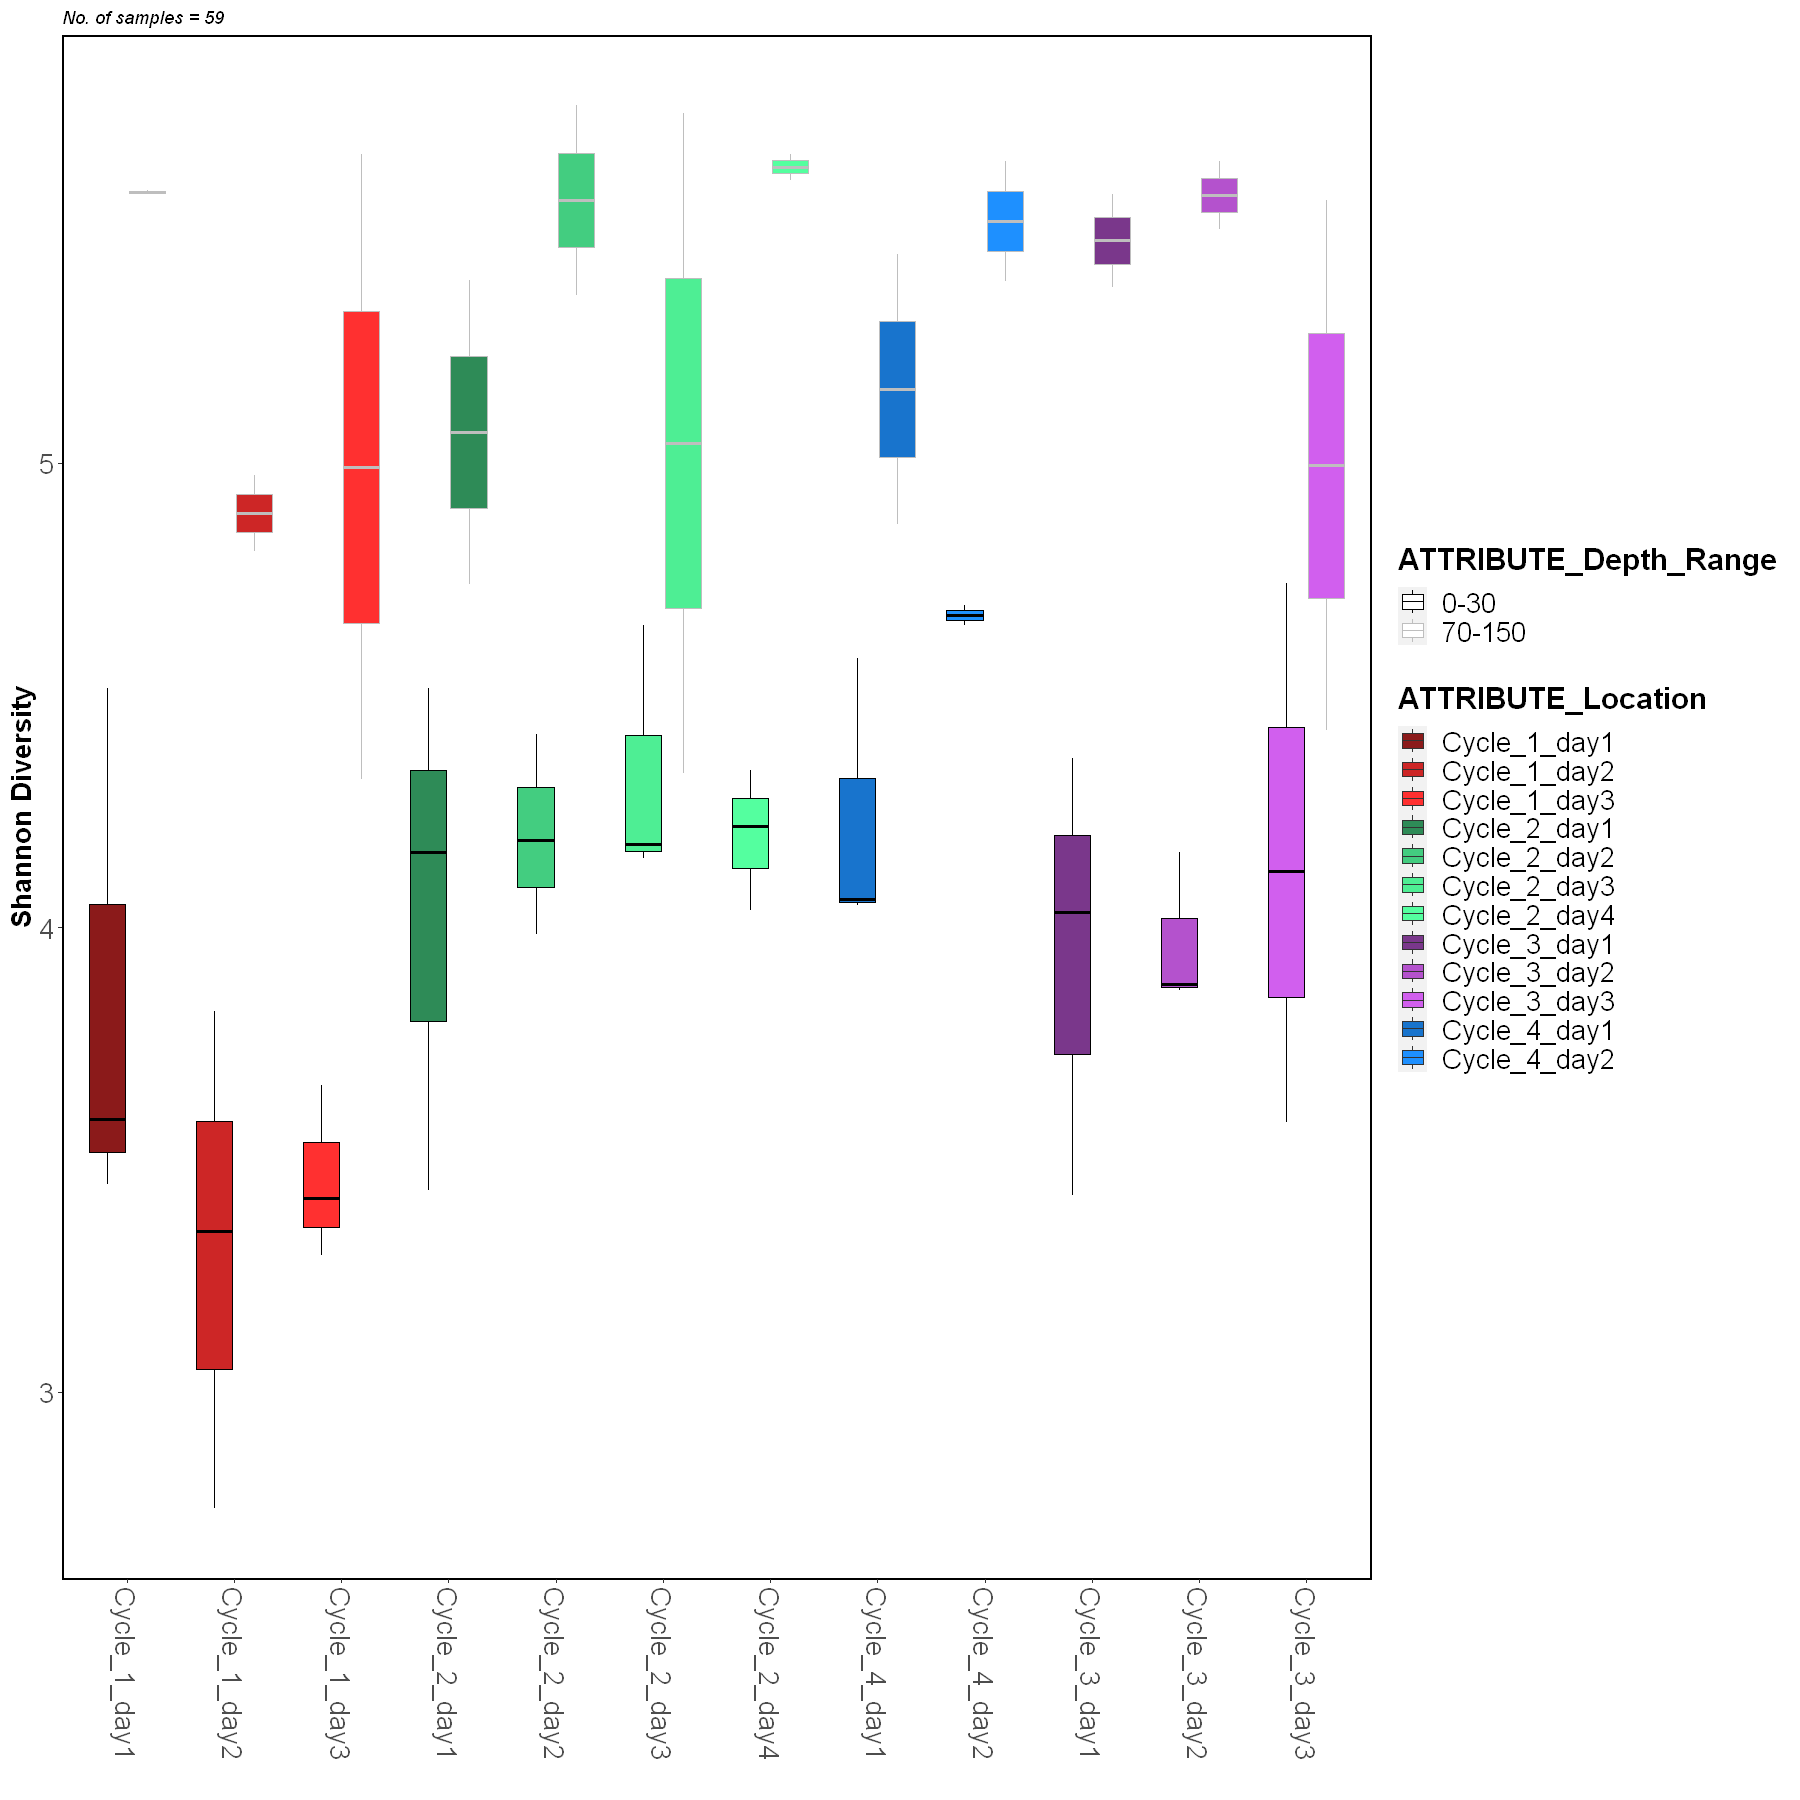

In [125]:
asv18s_alphadiversity_plot <- alpha_diversity_boxplot(table = md_18s, y_axis = md_18s$`Shannon_18s`)
asv18s_alphadiversity_plot

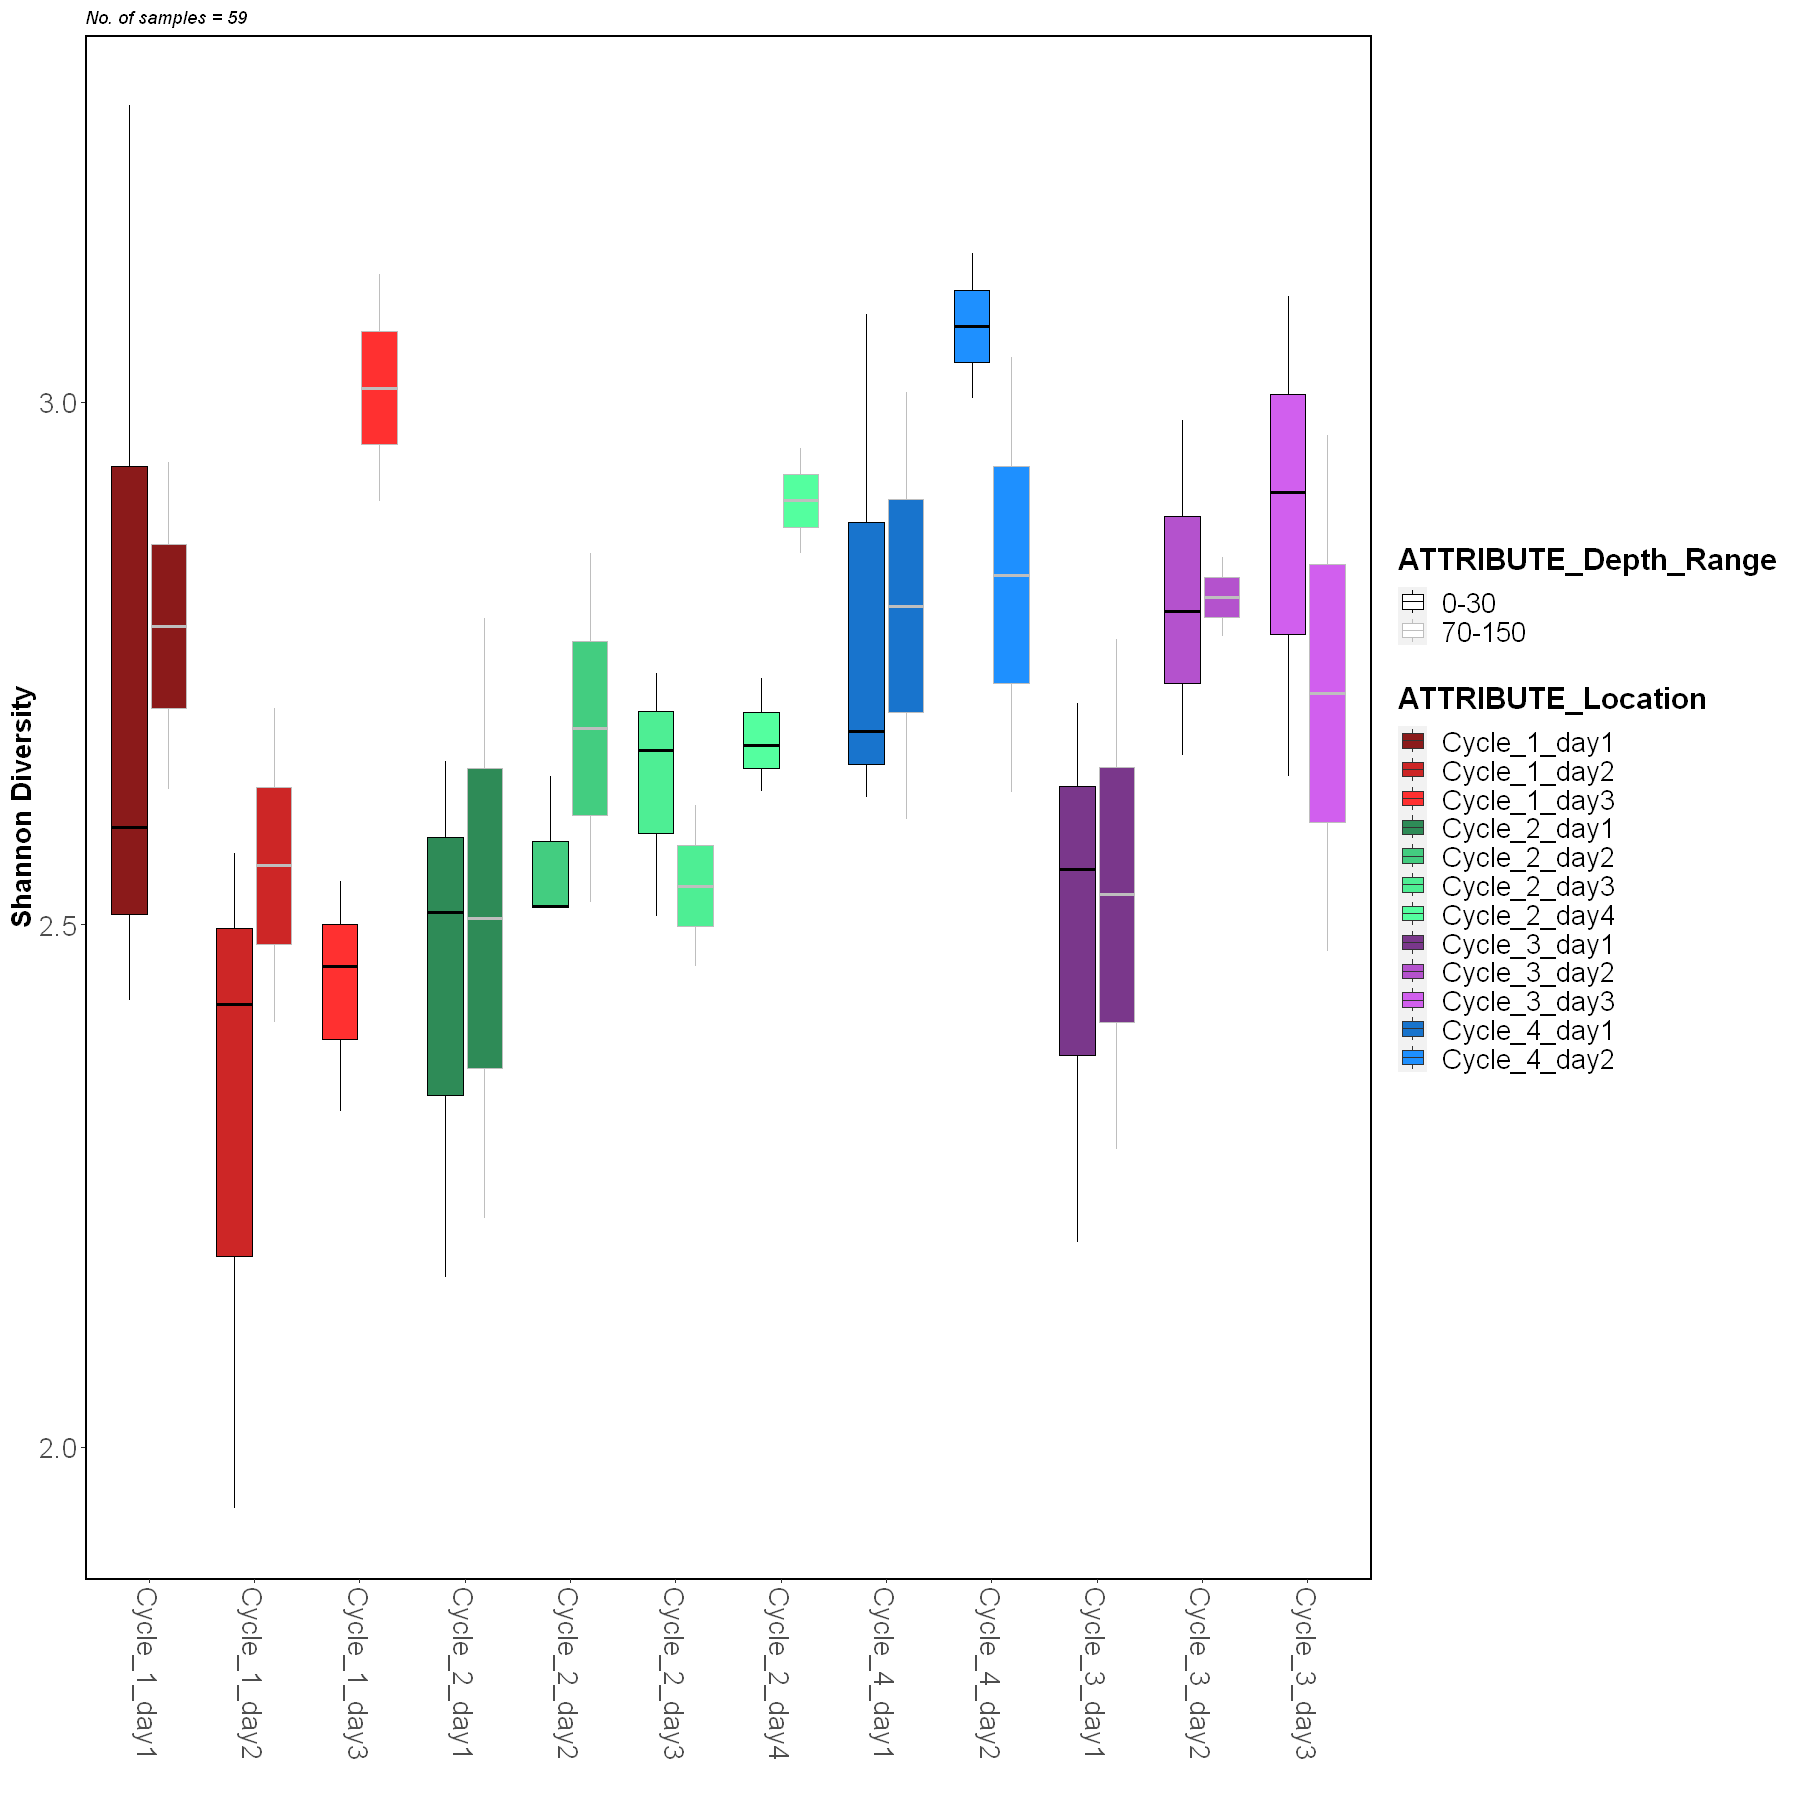

In [118]:
asv18s_alphadiversity_plot_genus <- alpha_diversity_boxplot(table = md_18s, y_axis = md_18s$`Shannon_18s_genus`)
asv18s_alphadiversity_plot_genus

In [100]:
ggsave("boxplots_alpha_diversity_0-30m_70-150m_asv18s_species.svg", asv18s_alphadiversity_plot, width=12, height=10) 

In [119]:
ggsave("boxplots_alpha_diversity_0-30m_70-150m_asv18s_genus.svg", asv18s_alphadiversity_plot_genus, width=12, height=10) 